In [1]:
import nfl_data_py as nfl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import urllib.request
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from adjustText import adjust_text

In [2]:
team_color = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LAR':'#002147','LAC':'#2072BA',
          'MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C','NYJ':'#203731',
          'LV':'#C4C9CC','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

In [3]:
import_data = nfl.import_seasonal_data([2022])
seasonal_attempts = pd.DataFrame(index = import_data.index)
seasonal_attempts["Player ID"] = import_data["player_id"]
seasonal_attempts["pass_attempts"] = import_data["attempts"]

import_weekly_data = nfl.import_weekly_data([2022])             
weekly_attempts = pd.DataFrame(index = import_weekly_data.index)
weekly_attempts["Player"] = import_weekly_data["player_name"]
weekly_attempts["Player ID"] = import_weekly_data["player_id"]
weekly_attempts["Team"] = import_weekly_data["recent_team"]
weekly_attempts["Player Full Name"] = import_weekly_data["player_display_name"]
weekly_attempts = weekly_attempts.drop_duplicates(subset=['Player Full Name'])

merged_attempts = weekly_attempts.merge(seasonal_attempts, left_on='Player ID', right_on='Player ID')
merged_attempts = merged_attempts.drop(columns=["Player", "Player ID", "Player Full Name"])
merged_attempts.loc[merged_attempts["Team"] == "LA", "Team"] = "LAR"
merged_attempts = merged_attempts.groupby(["Team"]).sum()

Downcasting floats.


In [4]:
import_data = nfl.import_seasonal_data([2022])             
wr_season_data = pd.DataFrame(index = import_data.index)
wr_season_data["Player ID"] = import_data["player_id"]
wr_season_data["Receptions"] = import_data["receptions"]
wr_season_data["Targets"] = import_data["targets"]
wr_season_data["Receiving Yards"] = import_data["receiving_yards"]
wr_season_data["Receiving TDs"] = import_data["receiving_tds"]
wr_season_data["Fumbles"] = import_data["receiving_fumbles"]
wr_season_data["Fumbles Lost"] = import_data["receiving_fumbles_lost"]
wr_season_data["Air Yards"] = import_data["receiving_air_yards"]
wr_season_data["YAC"] = import_data["receiving_yards_after_catch"]
wr_season_data["Receiving 1st Downs"] = import_data["receiving_first_downs"]
wr_season_data["Receiving EPA"] = import_data["receiving_epa"]
wr_season_data["Receiving 2pt Conversions"] = import_data["receiving_2pt_conversions"]
wr_season_data["RACR"] = import_data["racr"]
wr_season_data["Target Share"] = import_data["target_share"]
wr_season_data["Air Yards Share"] = import_data["air_yards_share"]
wr_season_data["Games Played"] = import_data["games"]
wr_season_data

,Player ID,Receptions,Targets,Receiving Yards,Receiving TDs,Fumbles,Fumbles Lost,Air Yards,YAC,Receiving 1st Downs,Receiving EPA,Receiving 2pt Conversions,RACR,Target Share,Air Yards Share,Games Played
0,00-0019596,0,1,0.0,0,0.0,0.0,16.0,0.0,0.0,-4.726016,0,0.000000,0.034483,0.061303,10
1,00-0023459,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0.000000,0.000000,0.000000,11
2,00-0024243,3,3,20.0,1,0.0,0.0,15.0,5.0,2.0,1.793661,0,2.357143,0.103273,0.036205,3
3,00-0026143,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0.000000,0.000000,0.000000,8
4,00-0026158,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0.000000,0.000000,0.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,00-0038120,19,31,218.0,1,1.0,1.0,147.0,171.0,8.0,-1.432692,0,10.057288,0.805021,0.401604,7
532,00-0038124,18,28,243.0,5,0.0,0.0,353.0,102.0,10.0,14.408372,0,3.594424,1.021374,1.348361,8
533,00-0038128,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0.000000,0.000000,0.000000,4
534,00-0038129,26,35,281.0,1,0.0,0.0,179.0,118.0,13.0,12.774899,0,7.249365,0.794364,0.617577,8


In [5]:
import_weekly_data = nfl.import_weekly_data([2022])             
wr_data = pd.DataFrame(index = import_weekly_data.index)
wr_data["Player"] = import_weekly_data["player_name"]
wr_data["Player ID"] = import_weekly_data["player_id"]
wr_data["Team"] = import_weekly_data["recent_team"]
wr_data["Player Full Name"] = import_weekly_data["player_display_name"]
wr_data = wr_data.drop_duplicates(subset=['Player Full Name'])
wr_data.loc[wr_data["Team"] == "LA", "Team"] = "LAR"

Downcasting floats.


In [6]:
wr_merged_season_data = wr_data.merge(wr_season_data, left_on='Player ID', right_on='Player ID')
wr_merged_season_data = wr_merged_season_data.drop(columns=["Player ID"])
wr_merged_season_data = wr_merged_season_data.merge(merged_attempts, left_on='Team', right_on='Team')
wr_merged_season_data["Target Share"] = wr_merged_season_data["Targets"]/wr_merged_season_data["pass_attempts"]
wr_merged_season_data.sort_values(by=['Team'])

,Player,Team,Player Full Name,Receptions,Targets,Receiving Yards,Receiving TDs,Fumbles,Fumbles Lost,Air Yards,YAC,Receiving 1st Downs,Receiving EPA,Receiving 2pt Conversions,RACR,Target Share,Air Yards Share,Games Played,pass_attempts
154,C.McCoy,ARI,Colt McCoy,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0.000000,0.000000,0.000000,1,401
155,A.Green,ARI,A.J. Green,12,25,66.0,1,0.0,0.0,266.0,12.0,6.0,-9.004618,1,2.083663,0.062344,0.945833,7,401
170,T.McBride,ARI,Trey McBride,4,4,31.0,0,1.0,0.0,17.0,14.0,1.0,1.974252,0,3.400000,0.009975,0.088356,2,401
168,R.Moore,ARI,Rondale Moore,41,56,414.0,1,0.0,0.0,309.0,281.0,16.0,11.375221,0,17.932574,0.139651,1.389075,7,401
167,E.Benjamin,ARI,Eno Benjamin,24,33,184.0,0,0.0,0.0,-39.0,222.0,10.0,4.193206,0,-24.114219,0.082294,-0.134882,9,401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,J.McKissic,WAS,J.D. McKissic,27,40,173.0,0,0.0,0.0,50.0,152.0,7.0,-17.902239,1,29.015915,0.113314,0.180590,8,353
412,T.Heinicke,WAS,Taylor Heinicke,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0.000000,0.000000,0.000000,4,353
426,B.Robinson,WAS,Brian Robinson,4,4,7.0,0,0.0,0.0,-15.0,22.0,0.0,-0.921503,0,-0.767857,0.011331,-0.077463,6,353
417,C.Sims,WAS,Cam Sims,5,13,58.0,0,0.0,0.0,184.0,19.0,3.0,-5.907294,0,2.719697,0.036827,0.666652,8,353


In [7]:
wr_data_ngs = pd.read_csv("../Resources/ngs_2022_receiving.csv")
wr_data_ngs = wr_data_ngs.loc[wr_data_ngs["week"] == 0, :]
wr_data_ngs = wr_data_ngs.sort_values(by=['team_abbr'])
wr_data_ngs = wr_data_ngs.drop_duplicates(subset=['player_display_name'])
wr_data_full = wr_data_ngs.merge(wr_merged_season_data, left_on='player_display_name', right_on='Player Full Name')
wr_data_full = wr_data_full.drop(columns = ["season", "season_type", "player_first_name", "player_last_name",
                                            "player_jersey_number", "week", "Team", "Player Full Name", "Receptions",
                                           "Targets", "Receiving Yards", "Receiving TDs"])
wr_data_full.columns

Index(['player_display_name', 'player_position', 'team_abbr', 'avg_cushion',
       'avg_separation', 'avg_intended_air_yards',
       'percent_share_of_intended_air_yards', 'receptions', 'targets',
       'catch_percentage', 'yards', 'rec_touchdowns', 'avg_yac',
       'avg_expected_yac', 'avg_yac_above_expectation', 'player_gsis_id',
       'player_short_name', 'Player', 'Fumbles', 'Fumbles Lost', 'Air Yards',
       'YAC', 'Receiving 1st Downs', 'Receiving EPA',
       'Receiving 2pt Conversions', 'RACR', 'Target Share', 'Air Yards Share',
       'Games Played', 'pass_attempts'],
      dtype='object')

In [8]:
wr_data_full = wr_data_full.loc[wr_data_full["targets"]/wr_data_full["Games Played"] >= 5, :]
wr_data_full = wr_data_full.reset_index()
wr_data_full = wr_data_full.drop(columns = ["index"])
#wr_data_full = wr_data_full.drop(columns = ["level_0"])
wr_data_full

,player_display_name,player_position,team_abbr,avg_cushion,avg_separation,avg_intended_air_yards,percent_share_of_intended_air_yards,receptions,targets,catch_percentage,...,Air Yards,YAC,Receiving 1st Downs,Receiving EPA,Receiving 2pt Conversions,RACR,Target Share,Air Yards Share,Games Played,pass_attempts
0,Zach Ertz,TE,ARI,5.139123,3.039805,7.775507,21.783581,47,69,68.115942,...,548.0,130.0,24.0,6.274928,2,9.016133,0.172070,2.149493,10,401
1,DeAndre Hopkins,WR,ARI,6.693111,2.713565,8.647826,16.151626,36,46,78.260870,...,418.0,81.0,18.0,17.165715,0,4.029954,0.114713,1.755389,4,401
2,Rondale Moore,WR,ARI,7.497959,3.828381,5.271071,11.985010,41,56,73.214286,...,309.0,281.0,16.0,11.375221,0,17.932574,0.139651,1.389075,7,401
3,Marquise Brown,WR,ARI,6.838197,3.255560,10.351094,26.897857,43,64,67.187500,...,669.0,159.0,24.0,7.106133,0,4.430690,0.159601,2.440313,6,401
4,Kyle Pitts,TE,ATL,7.282683,2.853256,13.805185,31.589474,25,54,46.296296,...,784.0,107.0,18.0,2.823802,0,5.134679,0.233766,2.853317,9,231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,Chris Godwin,WR,TB,6.921045,2.696434,6.067260,14.758501,48,73,65.753425,...,424.0,232.0,24.0,12.522185,0,10.106033,0.170561,1.467515,8,428
71,Russell Gage,WR,TB,7.023243,3.628970,5.919250,7.889572,29,40,72.500000,...,218.0,94.0,12.0,0.417951,1,9.623480,0.093458,0.773085,7,428
72,Mike Evans,WR,TB,5.938750,2.564989,12.703684,32.171407,49,76,64.473684,...,948.0,123.0,33.0,26.577243,0,7.215865,0.177570,3.161314,9,428
73,Terry McLaurin,WR,WAS,5.672361,2.301354,13.531233,35.958107,46,73,63.013699,...,968.0,266.0,31.0,26.202603,0,8.760143,0.206799,3.781940,10,353


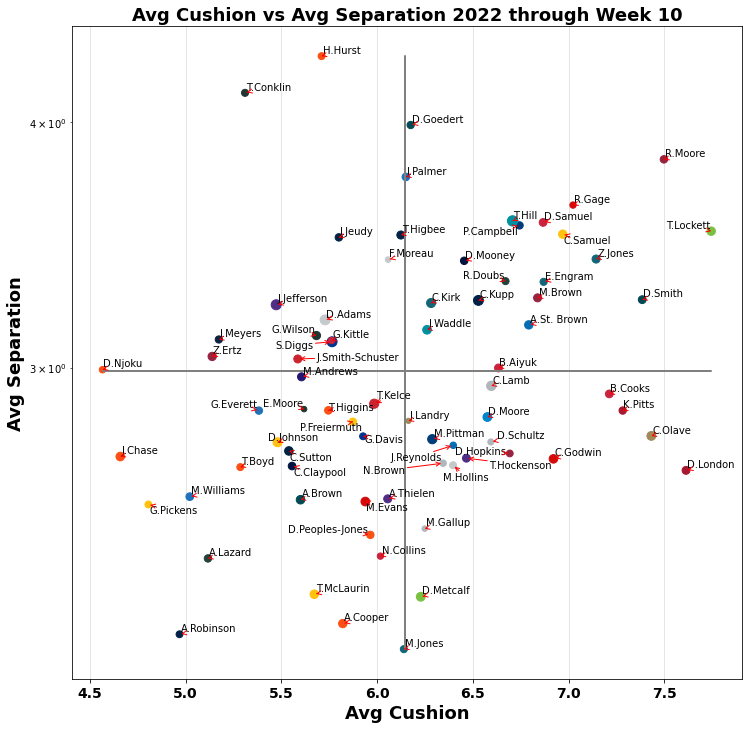

In [9]:
wr_graph = wr_data_full[["player_short_name", "avg_cushion", "avg_separation", "team_abbr", "targets"]]

x = wr_graph["avg_cushion"]
y = wr_graph["avg_separation"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in wr_graph["team_abbr"]:
    color.append(team_color[team])

size = wr_graph["targets"].to_numpy()
s = [s for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Avg Cushion', fontsize=18, fontweight = "bold")
plt.ylabel('Avg Separation', fontsize=18, fontweight = "bold")
plt.yscale('log')
plt.title('Avg Cushion vs Avg Separation 2022 through Week 10', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(wr_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

#plt.savefig('Images/AvgAirYards1stDown_vs_Passing1stDown', dpi=400)
plt.show()

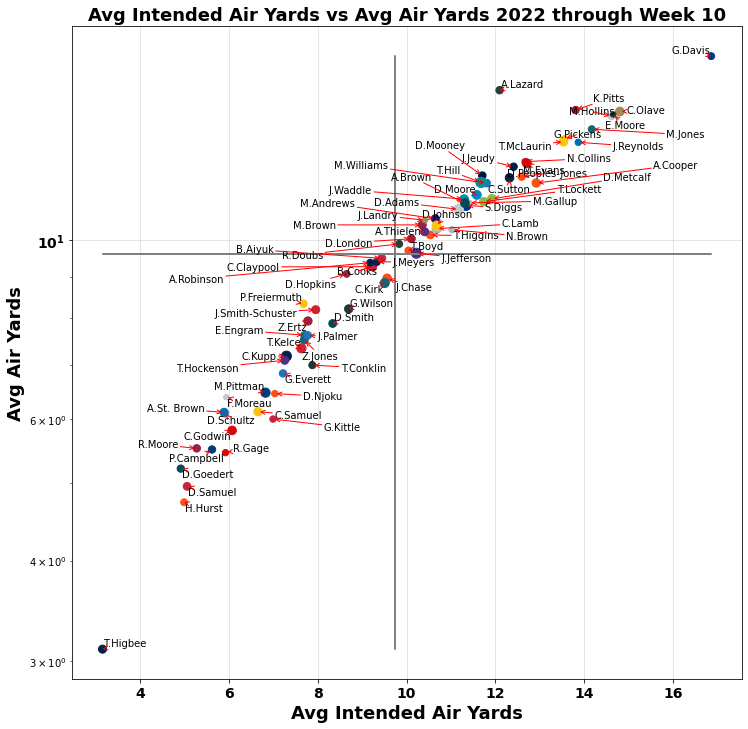

In [10]:
wr_graph = wr_data_full[["player_short_name", "avg_intended_air_yards", "Air Yards", "team_abbr", "targets"]]

x = wr_graph["avg_intended_air_yards"]
y = wr_graph["Air Yards"]/wr_graph["targets"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in wr_graph["team_abbr"]:
    color.append(team_color[team])

size = wr_graph["targets"].to_numpy()
s = [s for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Avg Intended Air Yards', fontsize=18, fontweight = "bold")
plt.ylabel('Avg Air Yards', fontsize=18, fontweight = "bold")
plt.yscale('log')
plt.title('Avg Intended Air Yards vs Avg Air Yards 2022 through Week 10', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(wr_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

#plt.savefig('Images/AvgAirYards1stDown_vs_Passing1stDown', dpi=400)
plt.show()

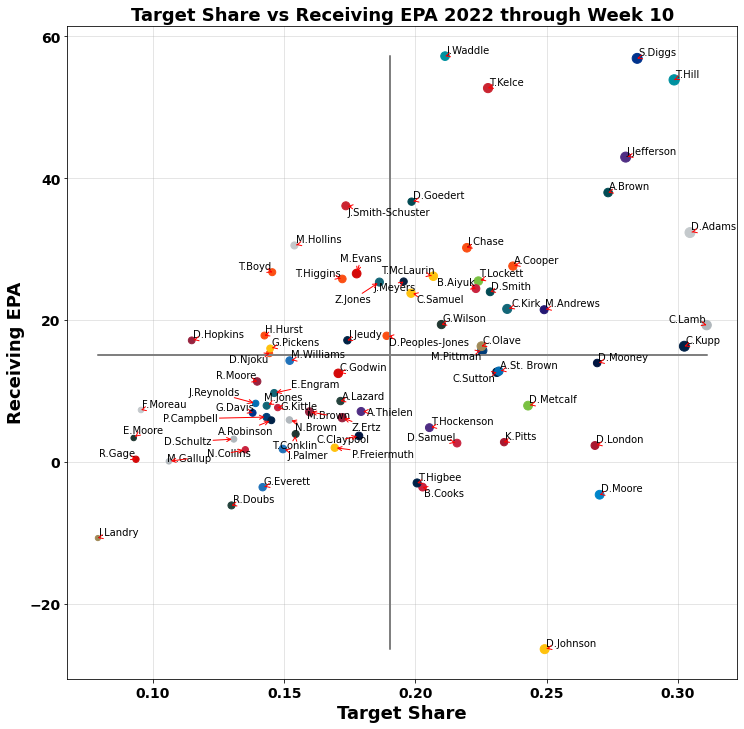

In [11]:
wr_graph = wr_data_full[["player_short_name", "Target Share", "Receiving EPA", "team_abbr", "targets"]]

x = wr_graph["Target Share"]
y = wr_graph["Receiving EPA"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in wr_graph["team_abbr"]:
    color.append(team_color[team])

size = wr_graph["targets"].to_numpy()
s = [s for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Target Share', fontsize=18, fontweight = "bold")
plt.ylabel('Receiving EPA', fontsize=18, fontweight = "bold")
#plt.yscale('log')
plt.title('Target Share vs Receiving EPA 2022 through Week 10', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(wr_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

#plt.savefig('Images/TargetShare_vs_RecEPA', dpi=400)
plt.show()

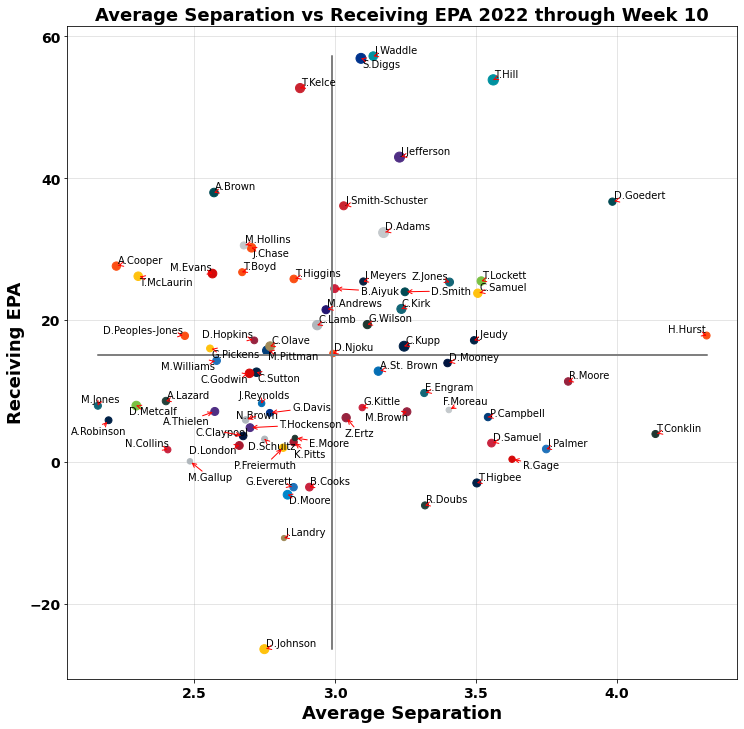

In [12]:
wr_graph = wr_data_full[["player_short_name", "avg_separation", "Receiving EPA", "team_abbr", "targets"]]

x = wr_graph["avg_separation"]
y = wr_graph["Receiving EPA"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in wr_graph["team_abbr"]:
    color.append(team_color[team])

size = wr_graph["targets"].to_numpy()
s = [s for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Average Separation', fontsize=18, fontweight = "bold")
plt.ylabel('Receiving EPA', fontsize=18, fontweight = "bold")
#plt.yscale('log')
plt.title('Average Separation vs Receiving EPA 2022 through Week 10', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(wr_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

#plt.savefig('Images/AvgAirYards1stDown_vs_Passing1stDown', dpi=400)
plt.show()

In [23]:
wr_data_pfr = pd.read_csv("../Resources/advstats_season_rec.csv")
wr_data_pfr = wr_data_pfr.loc[wr_data_pfr["season"] == 2022, :]
wr_data_pfr = wr_data_pfr.drop(columns=["season", "tm", "pfr_id", "age", "pos", "gs", "tgt", "rec","yds", "td",
                                        "loaded"])
wr_data_all = wr_data_full.merge(wr_data_pfr, left_on='player_display_name', right_on='player')
wr_data_all.columns

Index(['player_display_name', 'player_position', 'team_abbr', 'avg_cushion',
       'avg_separation', 'avg_intended_air_yards',
       'percent_share_of_intended_air_yards', 'receptions', 'targets',
       'catch_percentage', 'yards', 'rec_touchdowns', 'avg_yac',
       'avg_expected_yac', 'avg_yac_above_expectation', 'player_gsis_id',
       'player_short_name', 'Player', 'Fumbles', 'Fumbles Lost', 'Air Yards',
       'YAC', 'Receiving 1st Downs', 'Receiving EPA',
       'Receiving 2pt Conversions', 'RACR', 'Target Share', 'Air Yards Share',
       'Games Played', 'pass_attempts', 'player', 'g', 'x1d', 'ybc', 'ybc_r',
       'yac', 'yac_r', 'adot', 'brk_tkl', 'rec_br', 'drop', 'drop_percent',
       'int', 'rat'],
      dtype='object')

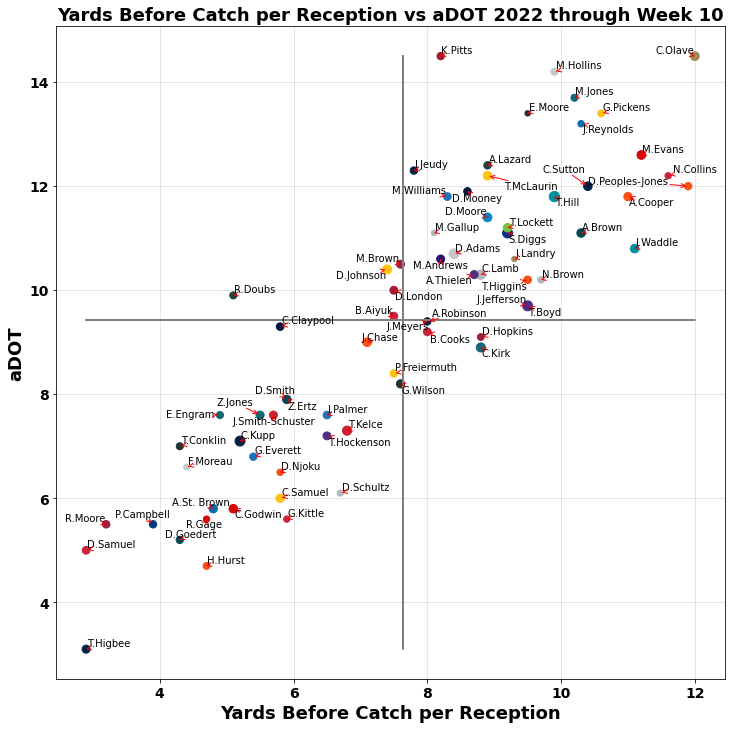

In [14]:
wr_graph = wr_data_all[["player_short_name", "ybc_r", "adot", "team_abbr", "targets"]]

x = wr_graph["ybc_r"]
y = wr_graph["adot"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in wr_graph["team_abbr"]:
    color.append(team_color[team])

size = wr_graph["targets"].to_numpy()
s = [s for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Yards Before Catch per Reception', fontsize=18, fontweight = "bold")
plt.ylabel('aDOT', fontsize=18, fontweight = "bold")
#plt.yscale('log')
plt.title('Yards Before Catch per Reception vs aDOT 2022 through Week 10', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(wr_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

#plt.savefig('Images/AvgAirYards1stDown_vs_Passing1stDown', dpi=400)
plt.show()

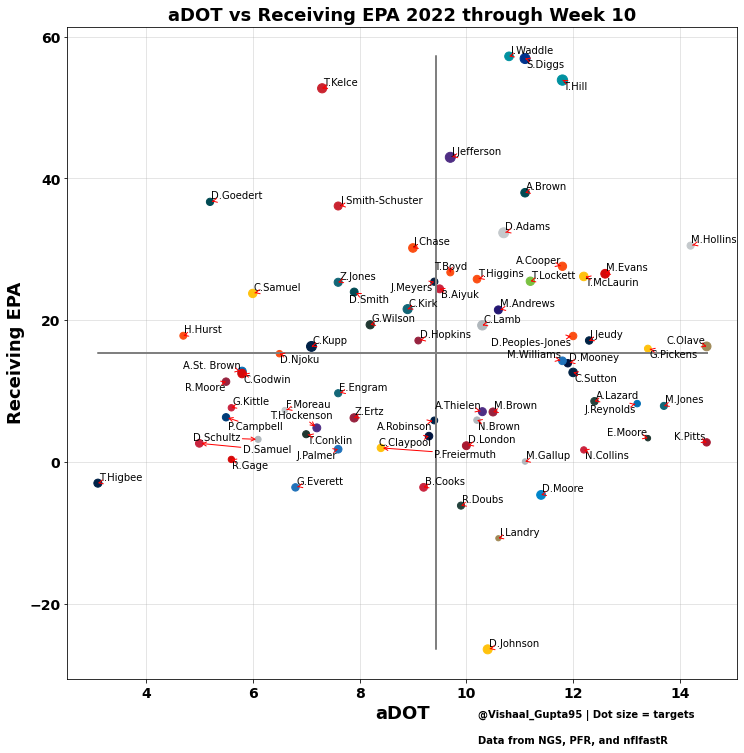

In [18]:
wr_graph = wr_data_all[["player_short_name", "adot", "Receiving EPA", "team_abbr", "targets"]]

x = wr_graph["adot"]
y = wr_graph["Receiving EPA"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in wr_graph["team_abbr"]:
    color.append(team_color[team])

size = wr_graph["targets"].to_numpy()
s = [s for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('aDOT', fontsize=18, fontweight = "bold")
plt.ylabel('Receiving EPA', fontsize=18, fontweight = "bold")
#plt.yscale('log')
plt.title('aDOT vs Receiving EPA 2022 through Week 10', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(wr_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

plt.figtext(.6, .08, '@Vishaal_Gupta95 | Dot size = targets', fontsize=10, fontweight = "bold")
plt.figtext(.6, .05, 'Data from NGS, PFR, and nflfastR', fontsize=10, fontweight = "bold")

#plt.savefig('Images/aDot_vs_RecEPA', dpi=400)
plt.show()

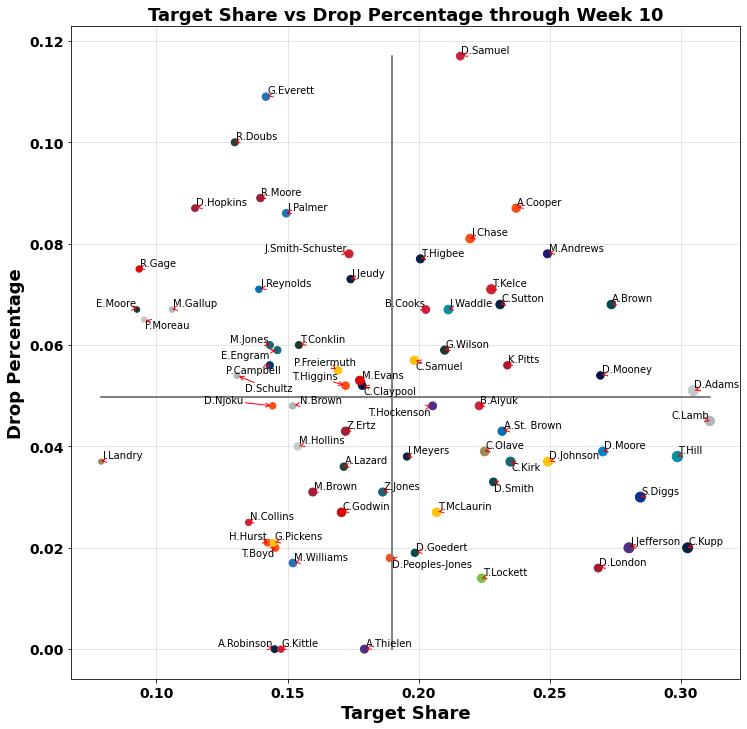

In [16]:
wr_graph = wr_data_all[["player_short_name", "Target Share", "drop_percent", "team_abbr", "targets"]]

x = wr_graph["Target Share"]
y = wr_graph["drop_percent"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in wr_graph["team_abbr"]:
    color.append(team_color[team])

size = wr_graph["targets"].to_numpy()
s = [s for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Target Share', fontsize=18, fontweight = "bold")
plt.ylabel('Drop Percentage', fontsize=18, fontweight = "bold")
#plt.yscale('log')
plt.title('Target Share vs Drop Percentage through Week 10', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(wr_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

#plt.savefig('Images/AvgAirYards1stDown_vs_Passing1stDown', dpi=400)
plt.show()

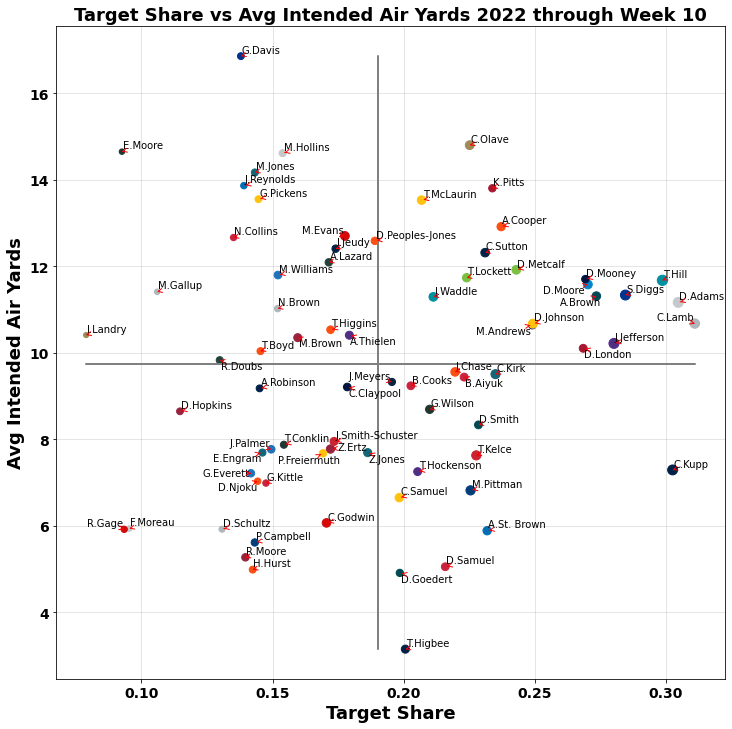

In [17]:
wr_graph = wr_data_full[["player_short_name", "Target Share", "avg_intended_air_yards", "team_abbr", "targets"]]

x = wr_graph["Target Share"]
y = wr_graph["avg_intended_air_yards"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in wr_graph["team_abbr"]:
    color.append(team_color[team])

size = wr_graph["targets"].to_numpy()
s = [s for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Target Share', fontsize=18, fontweight = "bold")
plt.ylabel('Avg Intended Air Yards', fontsize=18, fontweight = "bold")
#plt.yscale('log')
plt.title('Target Share vs Avg Intended Air Yards 2022 through Week 10', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(wr_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

#plt.savefig('Images/AvgAirYards_vs_TargetShare', dpi=400)
plt.show()